In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip\
  -O /tmp/horse-or-human.zip

--2020-07-15 12:36:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  89.6MB/s    in 1.6s    

2020-07-15 12:36:57 (89.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



Giving access to file system and zipfile library, allowing you to unzip tha data

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

Define horse and human directories

In [4]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

File names for horse and human directories look like below

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse34-3.png', 'horse14-7.png', 'horse21-1.png', 'horse24-0.png', 'horse16-6.png', 'horse07-7.png', 'horse45-9.png', 'horse20-5.png', 'horse41-6.png', 'horse33-6.png']
['human01-27.png', 'human03-18.png', 'human16-11.png', 'human16-22.png', 'human01-01.png', 'human15-23.png', 'human09-10.png', 'human12-28.png', 'human06-08.png', 'human07-24.png']


Total number of horse and human images in the directory

In [6]:
print('total training horse images: ', len(os.listdir(train_horse_dir)))
print('total training human images: ', len(os.listdir(train_human_dir)))

total training horse images:  500
total training human images:  527


Configure matplot parameters for displaying images



In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 5

pic_index = 0                             

Display a batch of 8 hourse and 8 human pictures

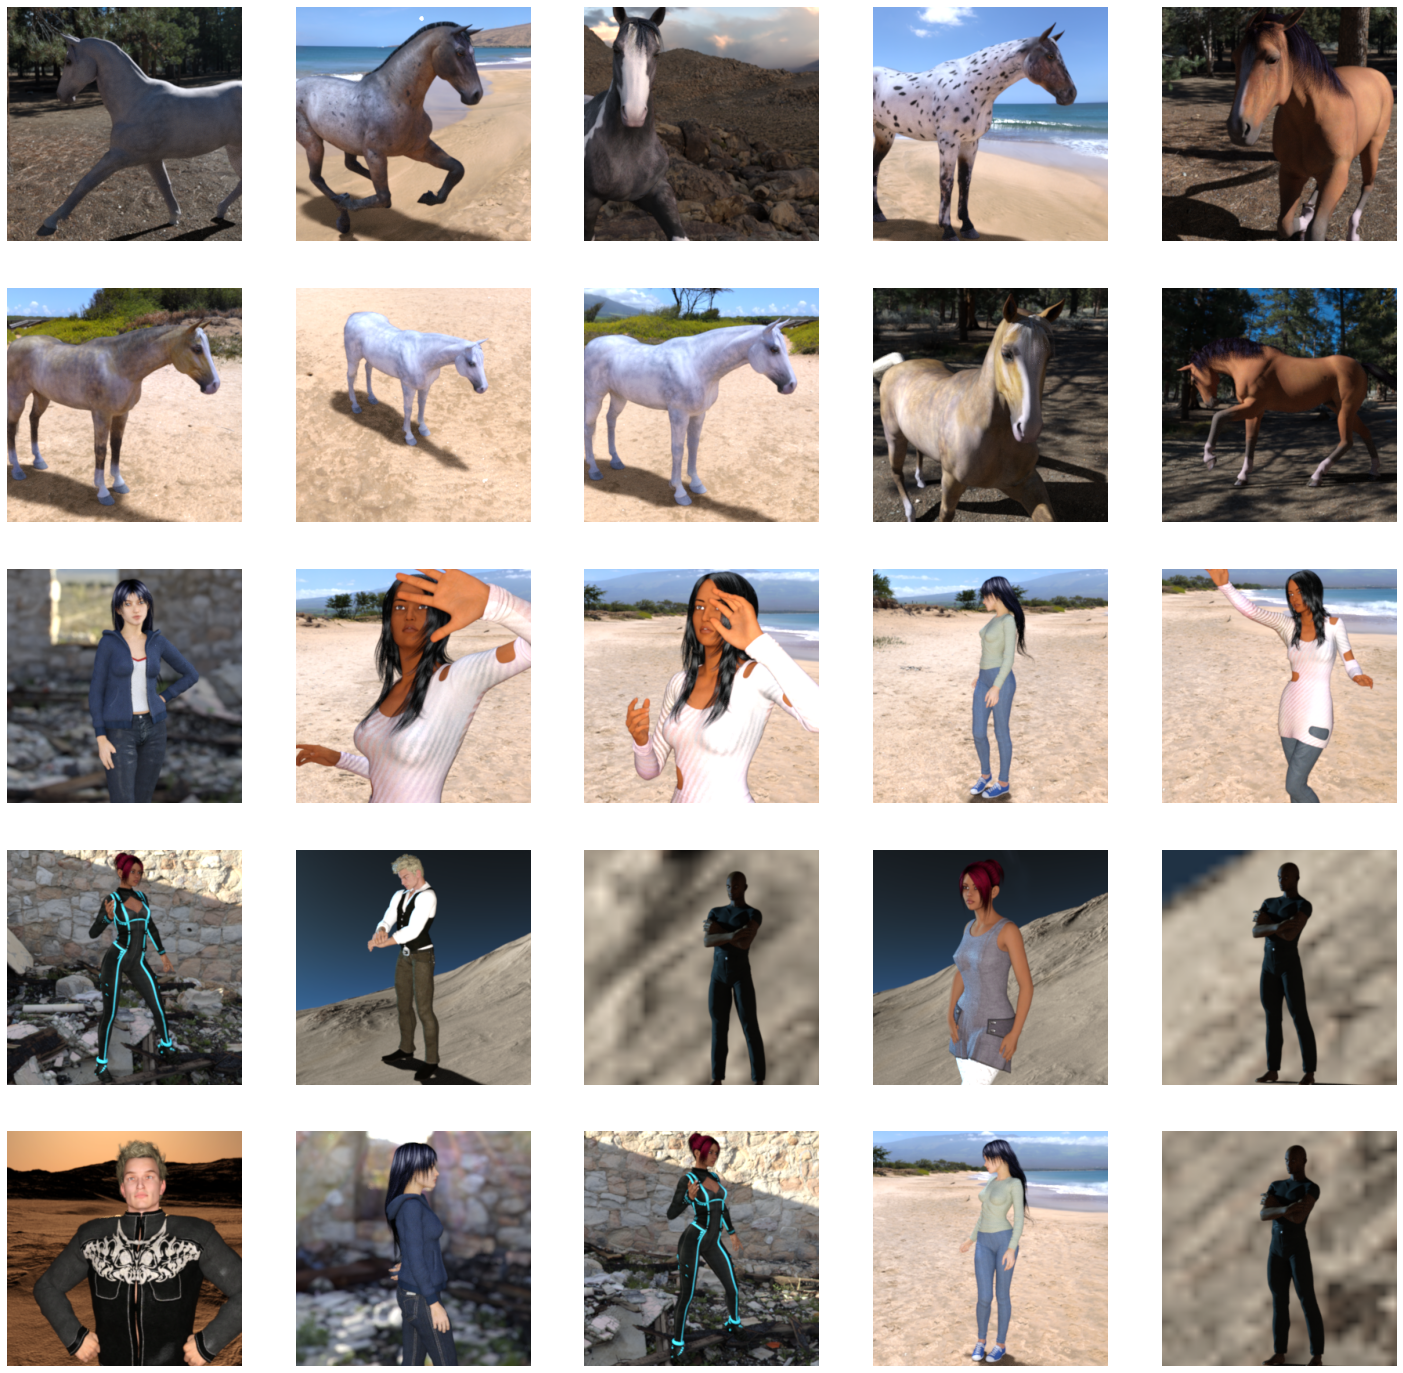

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*5, nrows*5)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index - 10 : pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index - 15 : pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows,ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

Building a small model from the scratch

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

Configure specification for model training.

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

Data Preprocessing

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


Training

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 6s 774ms/step - loss: 0.7079 - accuracy: 0.5884
Epoch 2/15
8/8 [==============================] - 7s 834ms/step - loss: 1.1521 - accuracy: 0.7070
Epoch 3/15
8/8 [==============================] - 6s 751ms/step - loss: 0.3854 - accuracy: 0.8643
Epoch 4/15
8/8 [==============================] - 7s 871ms/step - loss: 0.4241 - accuracy: 0.8699
Epoch 5/15
8/8 [==============================] - 7s 839ms/step - loss: 0.1493 - accuracy: 0.9414
Epoch 6/15
8/8 [==============================] - 6s 742ms/step - loss: 0.1577 - accuracy: 0.9333
Epoch 7/15
8/8 [==============================] - 6s 757ms/step - loss: 0.1121 - accuracy: 0.9522
Epoch 8/15
8/8 [==============================] - 7s 842ms/step - loss: 0.1121 - accuracy: 0.9609
Epoch 9/15
8/8 [==============================] - 7s 839ms/step - loss: 0.2436 - accuracy: 0.9082
Epoch 10/15
8/8 [==============================] - 6s 746ms/step - loss: 0.1402 - accuracy: 0.9511
Epoch 11/15
8/8 [==

Running the model

In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if(classes[0] > 0.5):
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving images (8).jpeg to images (8).jpeg
[1.]
images (8).jpeg is a human


Visualizing intermediate representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


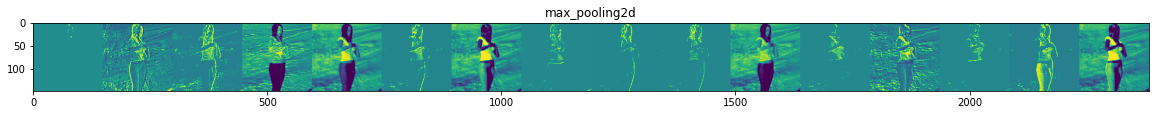

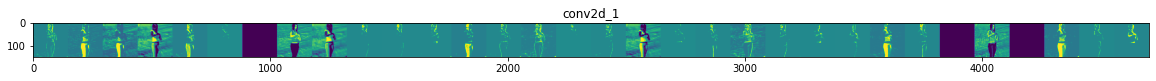

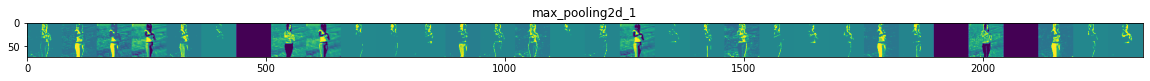

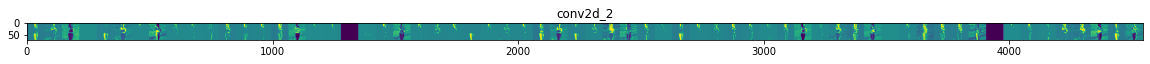

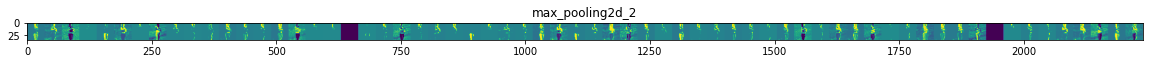

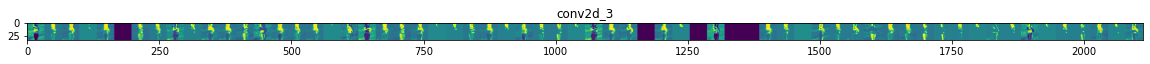

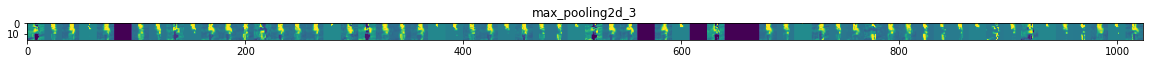

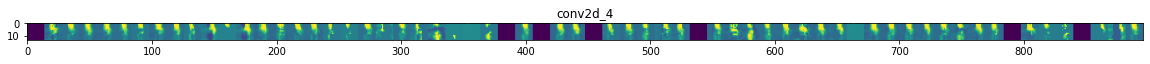

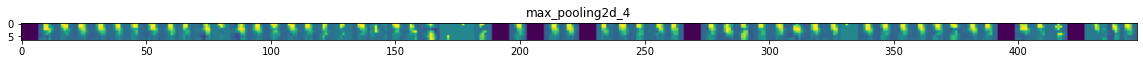

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300,300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if(len(feature_map.shape) == 4):
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))

    for i in range(n_features):
      x = feature_map[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i*size:(i+1)*size] = x
    scale = 20./n_features
    plt.figure(figsize = (scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')